<img src="img/ensemble_learning.png" >


- https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.colors.ListedColormap.html


Kullanılan Scikit-learn kütüphaneleri:
- train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- RobustScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
- make_moons: https://scikit-learn.org/stable/modules/generated/sklearn.data_classsets.make_moons.html
- make_circles: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
- make_classification: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
- KNeighborsClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- DecisionTreeClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- SVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- AdaBoostClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- VotingClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler #outlierden etkilenmez
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

# 1-Read Datasets

## A) make_classification Dataset
#### Generate a random n-class classification problem.

In [2]:
random_state = 42
n_samples = 2000 # sample number
n_features_class = 10 # feature number
n_classes = 2 # target class (binary 0 and 1)

noise_class = 0.3 #noise artınca karışıklık artar.
noise_moon = 0.3
noise_circle = 0.3

## 

In [3]:
X, y = make_classification( n_samples = n_samples,
                            n_features = n_features_class,
                            n_classes = n_classes,
                            n_repeated = 0,  # The number of duplicated features
                            n_redundant = 0, # The number of redundant features.
                            n_informative = n_features_class-1, #The number of informative features
                            random_state = random_state,
                            n_clusters_per_class = 1, # default=2
                            flip_y = noise_class) #The fraction of samples whose class is assigned randomly

In [4]:
data_class = pd.DataFrame(X)
data_class["target"] = y
data_class.head()

,0,1,2,3,4,5,6,7,8,9,target
0,0.787268,-2.703572,2.217740,-2.094802,-1.119239,1.261839,-4.412977,0.006461,-0.615683,-2.331903,0
1,0.325398,-2.378576,1.471479,0.233560,2.651340,0.827872,3.618302,-3.160228,-3.501295,2.206461,1
2,-0.627131,0.365065,-0.751039,-1.037417,-0.889539,-0.991561,0.632511,-3.097789,-4.327580,-0.446283,1
3,0.527348,-3.444553,0.264509,-0.304869,-2.263750,1.873942,0.898294,3.290475,1.728840,-0.247084,0
4,-0.627946,-2.809066,2.858751,-0.367843,3.134031,0.599341,1.753919,-4.888931,-0.628390,3.833755,1


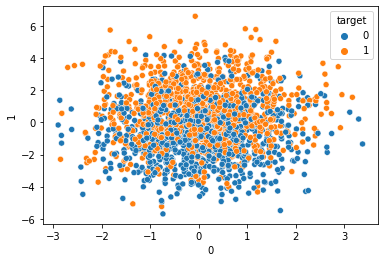

In [5]:
plt.figure()
sns.scatterplot(x = data_class.iloc[:,0], y =  data_class.iloc[:,1], hue = "target", data = data_class )
plt.show()

In [6]:
data_classification = (X,y) # ileride kullanılacak.

## B) make_moons Dataset
#### Make two interleaving half circles. A simple toy dataset to visualize clustering and classification algorithms. 

In [7]:
moon = make_moons(n_samples = n_samples, noise = noise_moon, random_state = random_state)

In [8]:
data_moon = pd.DataFrame(moon[0])
data_moon["target"] = moon[1]
data_moon.head()

,0,1,target
0,1.517571,0.424917,1
1,0.304268,0.999691,0
2,0.485924,-0.222913,1
3,-0.933579,-0.093579,0
4,0.684210,-0.436912,1


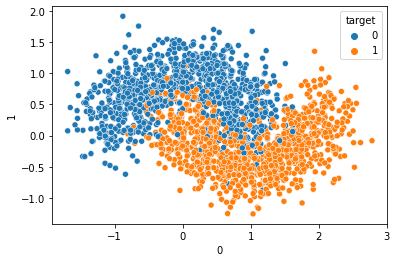

In [9]:
plt.figure()
sns.scatterplot(x = data_moon.iloc[:,0], y =  data_moon.iloc[:,1], hue = "target", data = data_moon )
plt.show()

## C) make_circle Dataset

In [10]:
circle = make_circles(n_samples = n_samples, factor = 0.1,  noise = noise_circle, random_state = random_state)

In [11]:
data_circle = pd.DataFrame(circle[0])
data_circle["target"] = circle[1]
data_circle.head()

,0,1,target
0,-0.324662,0.271197,1
1,-0.743240,0.901746,0
2,-0.063895,0.229819,1
3,0.850127,-0.946981,0
4,0.274620,-0.051114,1


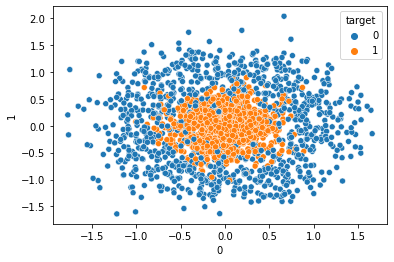

In [12]:
plt.figure()
sns.scatterplot(x = data_circle.iloc[:,0], y =  data_circle.iloc[:,1], hue = "target", data = data_circle )
plt.show()

In [13]:
datasets = [moon, circle]

# 2-Create Basic Models

SVM:
- Genellikle **Binary Classification** için kullanılır. => **Class** sayısı azaldıkça diğer modellere göre daha az başarılı.
- **Feature** sayısı/dimension arttıkça **SVM** diğer modellere göre daha iyi predictler yapar.
- Noise oranı artıkça başarı oranı biraz fazla düşer.
- Memory Efficient ancak diğer modeller gibi büyük verilerde işe yaramaz.
- Veri boyutu 20k-30k dan sonra neural networke yönelmek gerekli.
- Çıkan sonuçlar plotta yorumlaması knn ve dt'ye göre zor.

KNN:
- Genelde **Multi Classification**  için kullanılır. => Class sayısı arttıkça diğer modellere göre daha fazla başarılı.
- Basit ve güçlü bir algoritma ancak outlierden etkilenir, outliers'a dikkat.
- Training gerektirmediği için, training açısından => **time efficient**
- Veri boyutu arttıkça karar verme süresi uzuyor. Test açısından => **Not time efficient**

DT:
- En büyük problem overfitting, bu durumu çözmek için 2 temel yöntem:
    - Regularazation
    - Random Forest
- Dallanma artıkça tune etme ihtiyacı olabilir.
- Basit verilerde DT'ler çok etkili ama outliers'dan çok etkilenirler.

In [14]:
svc = SVC() #dimension=> feature artıkça SVM avantajlı hale gelir, daha iyi predictler yapar.
knn = KNeighborsClassifier(n_neighbors = 15) # default 5, biz başarısını düşürüyoruz.
dt = DecisionTreeClassifier(random_state = random_state, max_depth = 2)

In [15]:
namesBasicModels = ["SVC", "KNN", "Decision Tree"]
classifiersBasicModels = [svc, knn, dt]

# 3-Train and Visualize Data with Basic Models

In [16]:
%matplotlib qt5

def make_moons_and_circle(dcs, clfs, names):
    h = 0.2
    i = 1
    figure = plt.figure(figsize=(18, 6))
    for dataset_index, dataset in enumerate(dcs):
        # preprocess dataset, split into training and test part
        X, y = dataset # moon ve circle 2 var return ediyordu
        # scale işleminde outlierden etkilenmiyor ! :)
        X = RobustScaler().fit_transform(X) #normalde splitten sonra yapılması gerekir, ama veriseti düzenli.
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state = random_state)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))

        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])

        ax = plt.subplot(len(dcs), len(classifiersBasicModels) + 1, i)
        
        if dataset_index == 0:
            ax.set_title("Input data")
            
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, marker = '^', edgecolors='k')
        
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        print("Dataset # {}".format(dataset_index))

        for name, clf in zip(names, clfs):
            
            ax = plt.subplot(len(dcs), len(clfs) + 1, i)
            
            clf.fit(X_train, y_train)
            
            score = clf.score(X_test, y_test)
            
            print("{}: test set score: {} ".format(name, score))
            
            score_train = clf.score(X_train, y_train)  
            
            print("{}: train set score: {} ".format(name, score_train))
            print()
            
            
            if hasattr(clf, "decision_function"): # classifier "decision_function" diye bir attribute'e sahipse,
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # ravel=flatten, np.c_=concanate
            else:
                Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # knn or svm

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                    edgecolors='k')
            # Plot the testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,marker = '^',
                    edgecolors='white', alpha=0.6)

            ax.set_xticks(())
            ax.set_yticks(())
            if dataset_index == 0:
                ax.set_title(name)
            score = score * 100 # X_test score
            ax.text(xx.max() - .3, yy.min() + .3, ('%.1f' % score),
                    size=15, horizontalalignment='right')
            i += 1
        print("-------------------------------------")
    plt.tight_layout()
    plt.show()

Yukarıdaki plota göre:
- Arka plandaki renkler sınıflandırmanın sonucunu verir.
- Mavi ve kırmızı yuvarlak topcuklar => training sonuçlarını verir.
- Etrafı beyaz olan üçgenler => test sonuçlarını verir.

In [17]:
print("Dataset # 1")   
make_moons_and_circle(datasets, classifiersBasicModels, namesBasicModels)  

Dataset # 1
Dataset # 0
SVC: test set score: 0.91375 
SVC: train set score: 0.915 

KNN: test set score: 0.90375 
KNN: train set score: 0.9291666666666667 

Decision Tree: test set score: 0.8875 
Decision Tree: train set score: 0.9 

-------------------------------------
Dataset # 1
SVC: test set score: 0.89 
SVC: train set score: 0.9116666666666666 

KNN: test set score: 0.88375 
KNN: train set score: 0.9058333333333334 

Decision Tree: test set score: 0.73125 
Decision Tree: train set score: 0.7675 

-------------------------------------


In [18]:
def make_classify(dc, clf, name):
    x, y = dc
    x = RobustScaler().fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=random_state)
    
    for name, clf in zip(namesBasicModels, classifiersBasicModels):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {} ".format(name, score))
        score_train = clf.score(X_train, y_train)  
        print("{}: train set score: {} ".format(name, score_train))
        print()

print("Dataset # 2")   
make_classify(data_classification, classifiersBasicModels, namesBasicModels)  

Dataset # 2
SVC: test set score: 0.83875 
SVC: train set score: 0.8666666666666667 

KNN: test set score: 0.835 
KNN: train set score: 0.8583333333333333 

Decision Tree: test set score: 0.77 
Decision Tree: train set score: 0.7708333333333334 



# 4-Create Ensemble Models

RF:
- DT'lerden oluşan bir orman modeli
- DT'ler kullanılarak algoritma train ediliyor. 
- Daha sonra test verisi kullanılarak bu DT'ler bir arada olduğu orman(ensemble torbası) test ediliyor.
- En önemli featureları bulma açısından güvenilir bir modeldir.
- Overfittingi önlemekte etkilidir.
- Stability'si yüksek ikisi de variance'ı azaltmaya yönelik algoritmalardan birisidir.

<img src="img/rf.png" style="height: 450px">

ADABoost:
- Stability'si yüksek ikisi de variance'ı azaltmaya yönelik algoritmalardan bir diğeridir.
- Bias'ı azaltmada etkilidir.

<img src="img/ada.png" style="height: 450px">

Voting:
- Tüm algoritmaları toplayarak, tüm algoritmaların gücünü almak için kullabiliriz.

<img src="img/voting.png" style="height: 450px">

In [19]:
n_estimators = 10 # counts of trees 

In [20]:
rf = RandomForestClassifier(n_estimators = n_estimators, random_state = random_state, max_depth = 2)
ada = AdaBoostClassifier(base_estimator = dt, n_estimators = n_estimators, random_state = random_state) #decisiton tree kullanır.
v1 = VotingClassifier(estimators = [('svc', svc), ('knn', knn), ('dt', dt),('rf', rf), ('ada', ada)]) # voting: 'hard' => default

In [21]:
names = ["SVC", "KNN", "Decision Tree", "Random Forest", "AdaBoost", "Voting"]
classifiers = [svc, knn, dt, rf, ada, v1]

In [22]:
make_moons_and_circle(datasets, classifiers, names)  
print("Dataset # 2")   
make_classify(data_classification, classifiers, names)  

Dataset # 0
SVC: test set score: 0.91375 
SVC: train set score: 0.915 

KNN: test set score: 0.90375 
KNN: train set score: 0.9291666666666667 

Decision Tree: test set score: 0.8875 
Decision Tree: train set score: 0.9 

Random Forest: test set score: 0.8875 
Random Forest: train set score: 0.895 

AdaBoost: test set score: 0.8825 
AdaBoost: train set score: 0.9283333333333333 

Voting: test set score: 0.91 
Voting: train set score: 0.92 

-------------------------------------
Dataset # 1
SVC: test set score: 0.89 
SVC: train set score: 0.9116666666666666 

KNN: test set score: 0.88375 
KNN: train set score: 0.9058333333333334 

Decision Tree: test set score: 0.73125 
Decision Tree: train set score: 0.7675 

Random Forest: test set score: 0.87875 
Random Forest: train set score: 0.91 

AdaBoost: test set score: 0.88125 
AdaBoost: train set score: 0.9133333333333333 

Voting: test set score: 0.895 
Voting: train set score: 0.9125 

-------------------------------------
Dataset # 2
SVC: